<a href="https://colab.research.google.com/github/instrutorvilson/analise-dados/blob/aula4/vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({
    "Loja": [
        "Loja A","Loja A","Loja A","Loja A","Loja A",
        "Loja B","Loja B","Loja B","Loja B","Loja B",
        "Loja C","Loja C","Loja C","Loja C","Loja C",
        "Loja D","Loja D","Loja D","Loja D","Loja D",
        "Loja A","Loja B","Loja C","Loja D","Loja A","Loja C","Loja B"
    ],
    "Produto": [
        "Camiseta","Calça","Tênis","Bermuda","Jaqueta",
        "Camiseta","Calça","Tênis","Bermuda","Jaqueta",
        "Camiseta","Calça","Tênis","Bermuda","Jaqueta",
        "Camiseta","Calça","Tênis","Bermuda","Jaqueta",
        "Camiseta","Calça","Tênis","Camiseta","Jaqueta","Bermuda","Tênis"
    ],
    "Quantidade": [
        3,2,1,4,1,
        5,1,2,3,1,
        2,3,1,2,2,
        4,2,2,3,1,
        2,3,1,3,1,4,1
    ],
    "Preco": [
        50,120,300,70,250,
        55,110,280,65,270,
        48,130,320,75,260,
        52,115,290,68,255,
        50,115,310,52,250,75,280
    ],
    "DataVenda": [
        "2024-01-05","2024-01-05","2024-01-06","2024-01-07","2024-01-08",
        "2024-02-03","2024-02-03","2024-01-04","2024-01-06","2024-01-08",
        "2024-01-02","2024-01-03","2024-01-05","2024-01-06","2024-01-07",
        "2024-03-04","2024-01-06","2024-01-07","2024-05-08","2024-01-09",
        "2024-01-10","2024-05-10","2024-01-10","2024-01-10","2024-01-11",
        "2024-01-12","2024-01-12"
    ]
})

# Coluna já calculada
df["Vendas"] = df["Quantidade"] * df["Preco"]



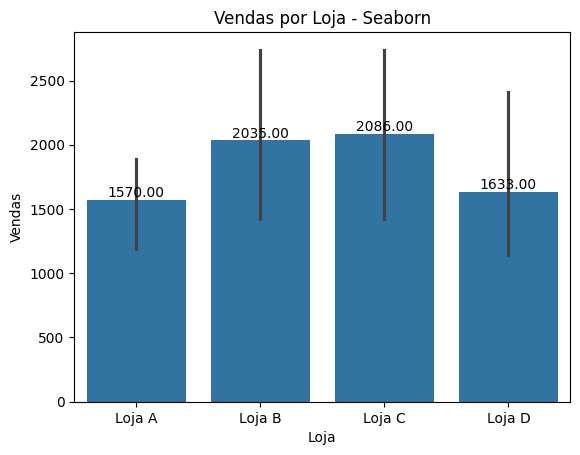

In [56]:
ax = sns.barplot(x="Loja", y="Vendas", data=df, estimator=np.sum)
plt.title("Vendas por Loja - Seaborn")

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   # posição x central
        valor,                           # posição y (em cima da barra)
        f'{valor:.2f}',                  # texto formatado
        ha='center',
        va='bottom'
    )

plt.show()

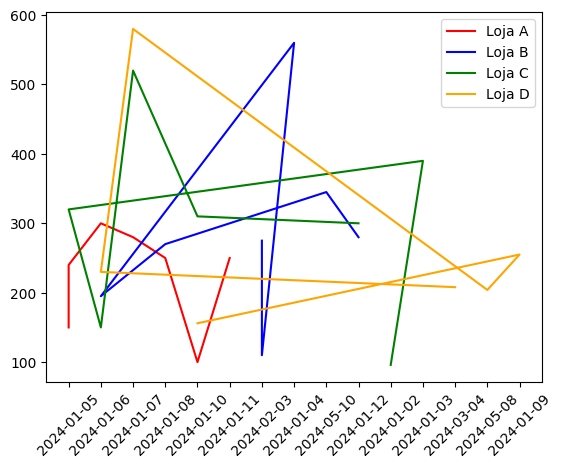

In [57]:
lojas = df["Loja"].unique()
cores = {"Loja A":"red", "Loja B":"blue", "Loja C":"green", "Loja D":"orange"}

for loja in lojas:
    dados = df[df["Loja"] == loja]
    plt.plot(dados["DataVenda"], dados["Vendas"], label=loja, color=cores[loja])
plt.xticks(rotation=45)
plt.legend()
plt.show()


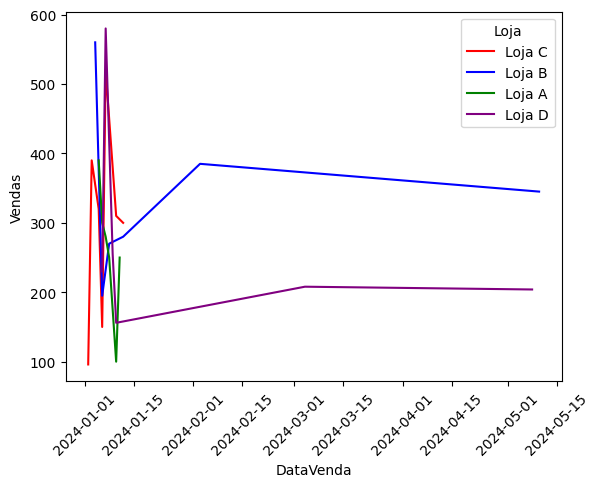

In [63]:
df_agg = df.groupby(["DataVenda","Loja"])["Vendas"].sum().reset_index()

sns.lineplot(
    data=df_agg,
    x="DataVenda",
    y="Vendas",
    hue="Loja",
    palette=["red","blue","green","purple"]
)

plt.xticks(rotation=45)
plt.show()


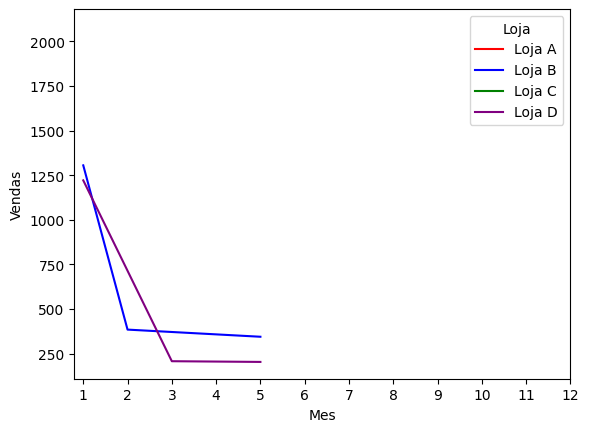

In [66]:
df["DataVenda"] = pd.to_datetime(df["DataVenda"])
df["Ano"] = df["DataVenda"].dt.year
df["Mes"] = df["DataVenda"].dt.month
df['Mes'] = df['Mes'].astype(int)

df_mes = df.groupby(["Ano", "Mes", "Loja"])["Vendas"].sum().reset_index()

sns.lineplot(
    data=df_mes,
    x="Mes",
    y="Vendas",
    hue="Loja",
    palette=["red","blue","green","purple"]
)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

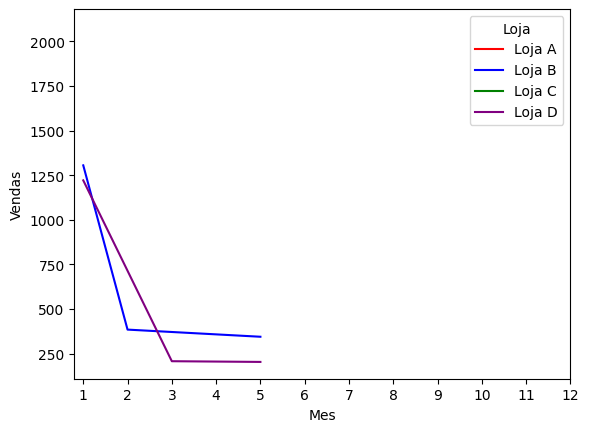

In [67]:
df["DataVenda"] = pd.to_datetime(df["DataVenda"])
df["Ano"] = df["DataVenda"].dt.year
df["Mes"] = df["DataVenda"].dt.month

# Agrupar por mês E loja
df_mes = df.groupby(["Ano", "Mes", "Loja"])["Vendas"].sum().reset_index()

sns.lineplot(
    data=df_mes,
    x="Mes",
    y="Vendas",
    hue="Loja",
    palette=["red", "blue", "green", "purple"]
)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

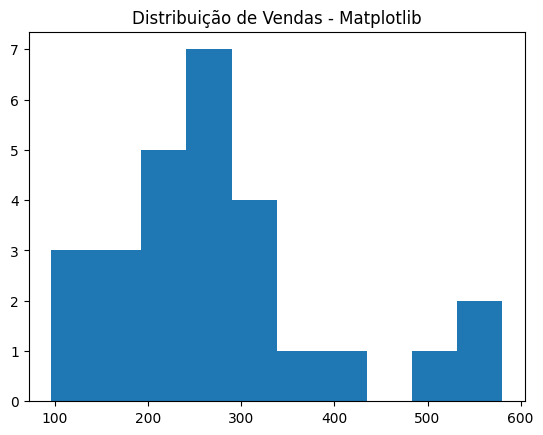

In [70]:
plt.hist(df["Vendas"])
plt.title("Distribuição de Vendas - Matplotlib")
plt.show()



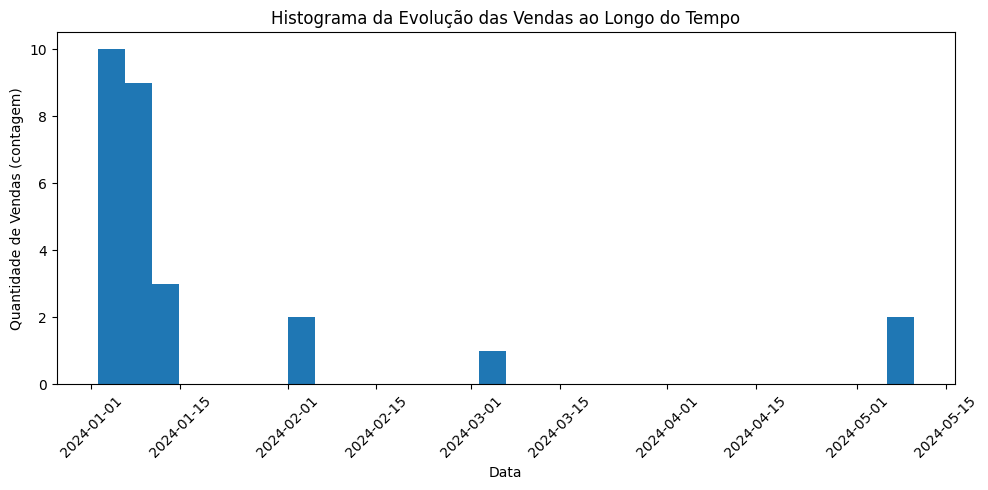

In [71]:
plt.figure(figsize=(10,5))

plt.hist(df["DataVenda"], bins=30)
plt.title("Histograma da Evolução das Vendas ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade de Vendas (contagem)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()